## Linearna regresija

Model linearne regresije pretpostavlja linearnu zavisnost po parametrima $\beta_0$, $\beta_1$, ..., $\beta_m$ između atributa $X_1$, $X_2$, ..., $X_m$ i ciljne promenljive $y$ koja je oblika $$y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_mX_m$$ 

Nadalje ce biti posmatran problem linearne regresije sa modelom $f(x) = \beta_0 + \beta_1x$. 

<img src='assets/linear_regression.png'>

Cilj primera je podsećanje na osnovne koncepte i API same bibliteke koji će biti korišćen u daljem radu.

### Biblioteka scikit-learn 

[scikit-learn](https://scikit-learn.org/) je Python bibloteka koja se specijalno koristi za zadatke mašinskog ucenja. `linear_model` je modul koji obezbeđuje metode za rad sa linearnim modelima kao što su linearna regresija, linearna regresija sa regularizacijama, logistička regresija i druge. `model_selection` je modul koji raspolaže funkcionalnostima poput podele skupa podataka na skupove za treniranje i testiranje, unakrsne validacije, generisanja stratifikovanih skupova, ... Modul `metrics` stavlja na raspolaganje različite metrike koje se mogu koristiti u evaluaciji. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [2]:
np.random.seed(7)

<br>
Skup podataka sa kojim ćemo raditi će biti sintetički. Vrednosti atributa će biti podeoci ekvidistantne mreže na intervalu [1, 5], a vrednosti ciljne funkcije ce biti generisane po formuli $y = 10x + 2sin(x)$ uz dodatak šuma. 

`N` je promenljiva koja će predstavljati veličinu skupa podataka.

In [3]:
N = 100

Dalje ćemo generisati vrednosti atributa `x` i vrednosti ciljne promenljive `y` i prikazati grafik zavisnosti. 

In [4]:
# rehape deo se odnosi na kreiranje vektora dizmenzije Nx1
x = np.linspace(1, 5, N).reshape(N, 1)

In [5]:
y = 11*np.sin(x) + 1.5* np.random.randn(N, 1)

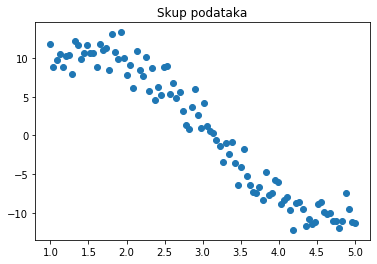

In [6]:
plt.title('Skup podataka')
plt.plot(x, y, 'o')
plt.show()

Pošto je cilj odrediti parametre $\beta_0$ i $\beta_1$ linearne regresije koji odgovaraju zadatom skupu podataka, sledeća funkcija će nam pomoći u izračunavanju vrednosti ciljne promenljive ovako naučenih modela.

In [7]:
def f(b0, b1, x):
    return b0+b1*x

Metod `train_test_split` se koristi za podelu skupa podataka na skup za treniranje i skup za testiranje. Srazmera ovih skupova određena je parametrima `train_size` ili `test_size`. Ovi parametri se izražavaju vrednostima od 0 do 1 i predstavljaju procentualni udeo naznačenog skupa. Na primer, dodelom `test_size=0.4` se ukazuje da će 40% podataka biti iskorišćeno za testiranje, a 60% za treniranje. Kako je ova podela na skupove za treniranje i testiranje nasumična, parametrom `random_state` se može vršiti kontrola podele. Ovaj vid kontrole nam je značajan zbog reprodukovanja eksperimenata. 

Skup podataka sa kojim radimo će biti podeljen u razmeri 60:40. 

In [8]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, random_state=7)

### Kreiranje modela

Metod `LinearRegression` koristimo za kreiranje linearnog regresionog modela. Podrazumevano je slobodni član $\beta_0$ pridružen modelu. Ukoliko je potrebno izostaviti ga, može se postaviti parametar `fit_intercept` konstruktorske funkcije na vrednost `False`.

In [9]:
model = linear_model.LinearRegression()

Funkcijom `fit` se vrši treniranje modela. Treniranje se vrši nad skupom za treniranje.

In [10]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Nakon treniranja, preko parametara `coef_` i `intercept_` možemo očitati koeficijente modela i vrednost slobodnog člana.

In [11]:
type(model.coef_)

numpy.ndarray

In [12]:
model.coef_.shape

(1, 1)

In [13]:
b1 = model.coef_[0][0]
b1

-6.888382319483821

In [14]:
type(model.intercept_)

numpy.ndarray

In [15]:
model.intercept_.shape

(1,)

In [16]:
b0 = model.intercept_[0]
b0

21.09523191378001

Nacrtaćemo grafik ovako dobijenog modela. 

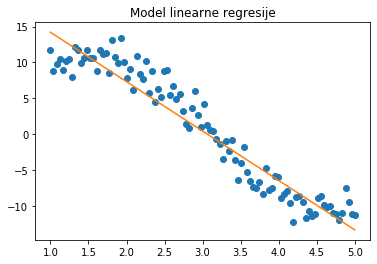

In [17]:
plt.title('Model linearne regresije')
plt.plot(x, y, 'o')
plt.plot(x, f(b0, b1, x))
plt.show()

### Predviđanje vrednosti naučenim modelom

Za predikciju vrednosti ciljne promenljive nad novim instancama može se koristiti funkcija `predict`. Za pojedinačne predikcije, njen argument treba da bude u formi vektora kolone.

In [18]:
model.predict(np.array([23]).reshape(-1, 1))

array([[-137.33756143]])

### Evaluacija modela

Za evaluaciju regresionih modela možemo iskoristiti koeficijent determinacije, srednjekvadratnu grešku ili srednju apsolutnu grešku. Srednjekvadratna i srednja apsolutna greška se izražavaju u terminima veličina ciljne promenljive, dok je vrednost koeficijenta determinacije normirana. Za računanje svake od vrednosti potrebne su nam tačne vrednosti ciljne promenljive i predikcije modela za isti skup instanci. 

#### Koeficijent determinacije $R^2$
    
$R^2 = 1 - \frac{\sum_i{(y_i-\hat{y_i})^2}}{\sum_i{(y_i - \bar{y})^2}}$

Vrednosti koeficijenta determinacije su iz intervala ${(-\infty, 1]}$ i vrednosti bliže jedinici označavaju bolje modele. 

In [19]:
def r_squared(y_true, y_predicted):
    u = ((y_true - y_predicted)**2).sum()
    
    y_mean = y_true.mean(); 
    v = ((y_true - y_mean)**2).sum()
    
    return 1 - u/v

#### Srednjekvadratna greška $MSE$: 
    
$MSE = \frac{1}{n} \sum_i{(y_i-\hat{y_i})^2}$

In [20]:
def mean_squared_error(y_true, y_predicted):
    
    return ((y_true - y_predicted)**2).mean();

Generisaćemo predikcije modela skupa za treniranje.

In [21]:
y_predicted = model.predict(x_test)

In [22]:
mean_squared_error(y_test, y_predicted)

5.382429274691026

In [23]:
r_squared(y_test, y_predicted)

0.9180067851070282

Ekvivalenti ovih funkcija, uz neka dodatna podešavanja, su dostupni i kroz paket `metrics`. Srednjekvadratnu grešku računa funkcija `mean_squared_error`, a koeficijent determinacije funkcija `r2_score`.

In [24]:
mse = metrics.mean_squared_error(y_test, y_predicted)
mse

5.382429274691026

In [25]:
r2 = metrics.r2_score(y_test, y_predicted)
r2

0.9180067851070282

Još jedna funkcija kojom se može izračunati vrednost koeficijenta determinacije je `score` metoda samog modela.

In [26]:
model.score(x_test, y_test)

0.9180067851070282